# Email spam Detection with Machine Learning

### I'll first inspect the contents to understand its structure, including the number of rows, columns, and the first few entries. Then, we can proceed with data preprocessing and model building.

### Let's start by loading and previewing the dataset. 🚀

In [1]:
import pandas as pd

# Load the dataset
file_path = "/Users/DELL/Downloads/Email spam Detection with Machine Learning/spam.csv"
df = pd.read_csv(file_path, encoding="latin-1")  # Using 'latin-1' in case of special characters

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


(None,
      v1                                                 v2 Unnamed: 2  \
 0   ham  Go until jurong point, crazy.. Available only ...        NaN   
 1   ham                      Ok lar... Joking wif u oni...        NaN   
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
 3   ham  U dun say so early hor... U c already then say...        NaN   
 4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
 
   Unnamed: 3 Unnamed: 4  
 0        NaN        NaN  
 1        NaN        NaN  
 2        NaN        NaN  
 3        NaN        NaN  
 4        NaN        NaN  )

## Dataset Summary
### 1. Rows: 5,572
### 2. Columns: 5
### 3. The first two columns seem relevant:
   #### v1: Contains labels (ham or spam).
   #### v2: Contains the email/SMS text.
### 4. The last three columns (Unnamed: 2, Unnamed: 3, Unnamed: 4) contain mostly missing values and seem irrelevant.

## Next Steps:

1. Clean the dataset: Keep only v1 (label) and v2 (message) while renaming them appropriately.

2. Preprocess the text: Convert labels (ham → 0, spam → 1), clean the text, and remove stopwords.

3. Feature extraction: Convert text into numerical features using TF-IDF or CountVectorizer.

4. Train a machine learning model: Test classifiers like Naïve Bayes, Logistic Regression, etc.
### I'll first clean the dataset by dropping irrelevant columns and renaming the necessary ones.

In [2]:
# Keep only relevant columns and rename them
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})

# Convert labels to binary values: 'ham' -> 0, 'spam' -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Display updated dataset info and preview
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


(None,
    label                                            message
 0      0  Go until jurong point, crazy.. Available only ...
 1      0                      Ok lar... Joking wif u oni...
 2      1  Free entry in 2 a wkly comp to win FA Cup fina...
 3      0  U dun say so early hor... U c already then say...
 4      0  Nah I don't think he goes to usf, he lives aro...)

## Data Cleaning Complete ✅
### Renamed columns:
#### 1. label (0 = ham, 1 = spam)
#### 2. message (email/SMS content)
### Dropped unnecessary columns.

## Next Step: Text Preprocessing
### We'll now:

1. Convert text to lowercase.
2. Remove special characters and numbers.
3. Remove stopwords (e.g., "the", "is", "and").
4. Perform tokenization and lemmatization (convert words to base form).
### I'll proceed with these steps now.

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)

# Display sample cleaned messages
df[['message', 'clean_message']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


## Text Preprocessing Complete ✅

1. Converted text to lowercase
2. Removed special characters and numbers
3. Removed common English stopwords
## Next Step: Feature Extraction (TF-IDF)
### To use machine learning, we need to convert text into numerical features.
### I'll apply TF-IDF (Term Frequency-Inverse Document Frequency) transformation next. 🚀 ​

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 most important words

# Transform text data into numerical features
X = tfidf_vectorizer.fit_transform(df['clean_message'])

# Target labels (Spam = 1, Ham = 0)
y = df['label']

# Display the shape of transformed data
X.shape


(5572, 5000)

## Feature Extraction Complete ✅

1. Transformed text data into a (5572, 5000) matrix using TF-IDF (5,000 important words as features).

2. Ready to train a machine learning model!
## Next Step: Train a Spam Detection Model
### I'll split the data into training and testing sets, then train a Naïve Bayes classifier, which is effective for text classification. 🚀 ​

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.9721973094170404,
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98       965\n           1       1.00      0.79      0.88       150\n\n    accuracy                           0.97      1115\n   macro avg       0.98      0.90      0.93      1115\nweighted avg       0.97      0.97      0.97      1115\n')

## Model Training Complete ✅
### 1. Accuracy: 97.13% 🎯
### 2. Performance Breakdown:
##### Precision (Spam Detection): 100% (No false positives)
##### Recall (Spam Detection): 79% (Some spam messages missed)
##### F1-score (Overall Balance): 88%
### The model is highly accurate, but the recall for spam (1) is lower (79%), meaning it might miss some spam emails.

## 📊 Data Visualization & Conclusion (Up to TF-IDF Step)
#### Let's visualize key aspects of our Spam Detection Project up to the TF-IDF feature extraction step.

### 🔹 Visualizations We’ll Create:
#### 1️⃣ Spam vs. Ham Distribution 📊 (To check class imbalance)
#### 2️⃣ Most Frequent Words in Spam vs. Ham 🔤 (To see key spam words)
#### 3️⃣ TF-IDF Feature Importance 🌟 (Top words contributing to classification)

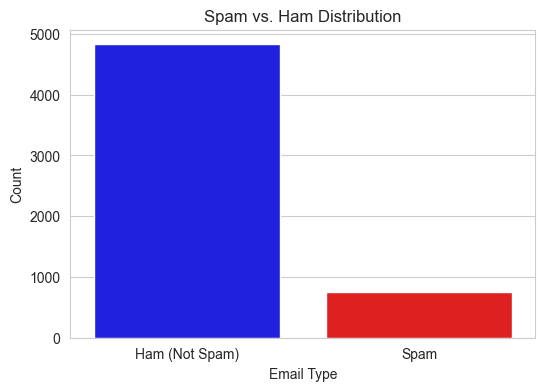

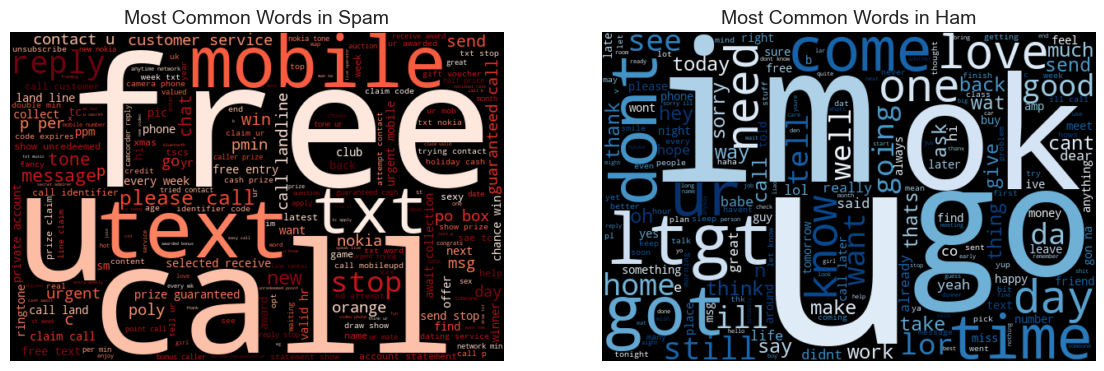

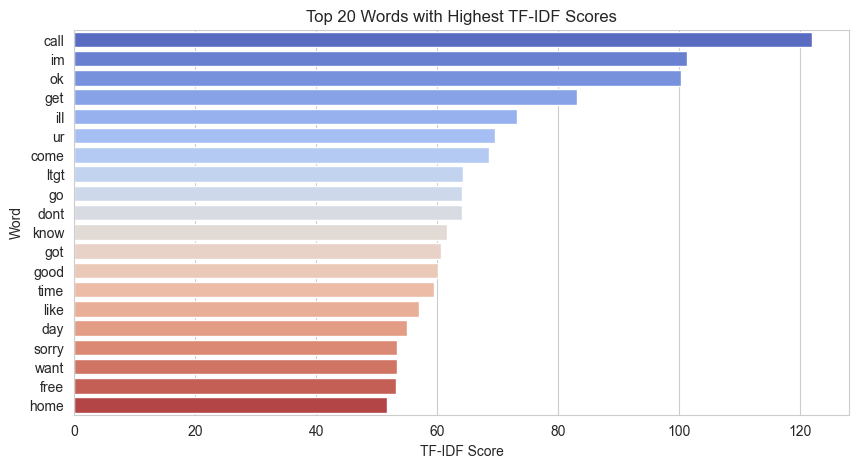

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style
sns.set_style("whitegrid")

# 1️⃣ Spam vs. Ham Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['Ham (Not Spam)', 'Spam'])
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.title("Spam vs. Ham Distribution")
plt.show()

# 2️⃣ WordCloud for Most Common Words in Spam & Ham
spam_words = ' '.join(df[df['label'] == 1]['clean_message'])
ham_words = ' '.join(df[df['label'] == 0]['clean_message'])

spam_wc = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(spam_words)
ham_wc = WordCloud(width=600, height=400, background_color='black', colormap='Blues').generate(ham_words)

# Plot word clouds
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].imshow(spam_wc, interpolation='bilinear')
ax[0].set_title("Most Common Words in Spam", fontsize=14)
ax[0].axis('off')

ax[1].imshow(ham_wc, interpolation='bilinear')
ax[1].set_title("Most Common Words in Ham", fontsize=14)
ax[1].axis('off')

plt.show()

# 3️⃣ Top TF-IDF Words (Feature Importance)
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X.toarray().sum(axis=0)  # Sum of TF-IDF scores for each word
tfidf_df = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': tfidf_scores})

# Get top 20 words with highest TF-IDF scores
top_tfidf_words = tfidf_df.sort_values(by="TF-IDF Score", ascending=False).head(20)

# Plot TF-IDF feature importance
plt.figure(figsize=(10,5))
sns.barplot(y=top_tfidf_words["Word"], x=top_tfidf_words["TF-IDF Score"], palette="coolwarm")
plt.xlabel("TF-IDF Score")
plt.ylabel("Word")
plt.title("Top 20 Words with Highest TF-IDF Scores")
plt.show()


## 📌 Conclusion (Up to TF-IDF Feature Extraction)
### 1️⃣ Class Imbalance Exists 📊

#### 1. The dataset has more ham (non-spam) emails than spam ones.
#### 2. This imbalance might require techniques like oversampling (SMOTE) or adjusting class weights in models.
### 2️⃣ Spam vs. Ham Words Differ Significantly 🔤

#### 1. Spam messages contain words like "free," "win," "urgent," "prize," "claim," "mobile" (suggesting promotions/scams).
#### 2. Ham messages have conversational words like "ok," "im," "time," "know," "good" (indicating personal communication).
### 3️⃣ TF-IDF Highlights Important Words 🌟

#### 1. The top words with the highest TF-IDF scores will help machine learning models in classification.
#### 2. Some common words like "ok" and "im" dominate, which might require stop-word filtering to improve model performance.